In [1]:
import os
import glob
import lsst.eotest.image_utils as imutils
import lsst.eotest.sensor as sensorTest
import lsst.eotest.raft as raft
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Setup + produce mean bias image (which works fine, now, thanks)

In [2]:
def gains(eotest_results_file):
    results = sensorTest.EOTestResults(eotest_results_file)
    return {amp: gain for amp, gain in zip(results['AMP'], results['GAIN'])}

tmp_dir = '/home/combet/tmp_new/' # change it to where you want the files saved

path = '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/red/'
fits_file = os.path.join(path,'11_CCOB_red_x295.0_y195.0_0000_20180420200617.fits.fz')
eo_data_path = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/collect_raft_results/v0/38904'
gains_dict={}
ccd_dict={}

slot = '11'

bias_frames = glob.glob(os.path.join(path, slot+'_bias*'))
mean_bias_file = slot+'_mean_bias_image_RTM-006_new.fits'
imutils.fits_mean_file(bias_frames, os.path.join(tmp_dir,mean_bias_file))
ccd_dict = sensorTest.MaskedCCD(fits_file, bias_frame=os.path.join(tmp_dir,mean_bias_file))
eotest_results_file = os.path.join(eo_data_path, '{}_eotest_results.fits'.format(ccd_dict.md('LSST_NUM')))
gains_dict = gains(eotest_results_file)

### Subtract bias + correct gains and save in new fits file
- using an uncompressed fits file as template
- a compressed fits.fz as template

In [3]:
outfile = os.path.join(tmp_dir,'RTM-006_ccd' + slot + '.fits')
outfile2 = os.path.join(tmp_dir,'RTM-006_ccd' + slot + '_2.fits')
image={}
for amp in ccd_dict:
    image[amp] = ccd_dict.bias_subtracted_image(amp)
    image[amp] *= gains_dict[amp]

# Use an 'old' file as template, produced before the file compression
template_file = os.path.join('/home/combet/tmp_new', slot+'_corr_mean_beam_image_RTM-006.fits')
imutils.writeFits({amp: image[amp].getImage() for amp in ccd_dict}, outfile, template_file)
   
# Use a compressed file as template
template_file = fits_file
imutils.writeFits({amp: image[amp].getImage() for amp in ccd_dict}, outfile2, template_file)



63822.0
64292.0
64449.0
64541.0
64798.0
64670.0
64550.0
64129.0
64377.0
64796.0
64847.0
64972.0
64802.0
64714.0
64354.0
63973.0
63822.0
64292.0
64449.0
64541.0
64798.0
64670.0
64550.0
64129.0
64377.0
64796.0
64847.0
64972.0
64802.0
64714.0
64354.0
63973.0


### Result obtained from using the old template is OK

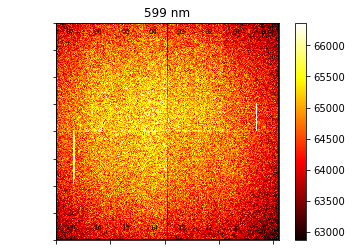

In [4]:
%matplotlib inline
sensorTest.plot_flat(os.path.join(tmp_dir,'RTM-006_ccd'+ slot +'.fits'))

### Result obtained from using the compressed file as template is not OK
- same problem as before, apparently linked to "bitpix" from the fix you applied to mean_fits_file

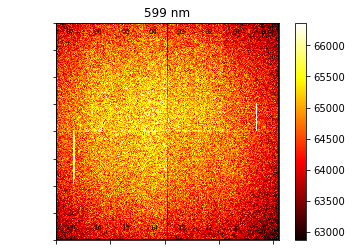

In [5]:
sensorTest.plot_flat(os.path.join(tmp_dir,'RTM-006_ccd'+ slot +'_2.fits'))